Installation of necessary packages.

In [ ]:
!pip install wget

In [ ]:
!pip install seaborn_image

Importing required libraries and packages.

In [ ]:
import wget
import os
import zipfile

import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn_image as isns

Downloading images from the imageprocessingplace.com site.

In [ ]:
url = 'http://www.imageprocessingplace.com/downloads_V3/dip3e_downloads/dip3e_book_images/DIP3E_CH03_Original_Images.zip'
if not os.path.exists('DIP3E_CH03_Original_Images.zip'):
    DIP3E_CH03_Original_Images = wget.download(url, out = 'DIP3E_CH03_Original_Images.zip') 
    zip = zipfile.ZipFile(DIP3E_CH03_Original_Images)
    zip.extractall()
img_path = ['/content/DIP3E_Original_Images_CH03/'+path for path in os.listdir('/content/DIP3E_Original_Images_CH03') if path.endswith('.tif')]

A total of 28 images have been downloaded.

In [ ]:
gray_scale_img = []
for path in img_path:
  img = Image.open(path)
  gray_scale_img.append(img)

print(len(gray_scale_img))

28


Let's have a look at all the downloaded images.

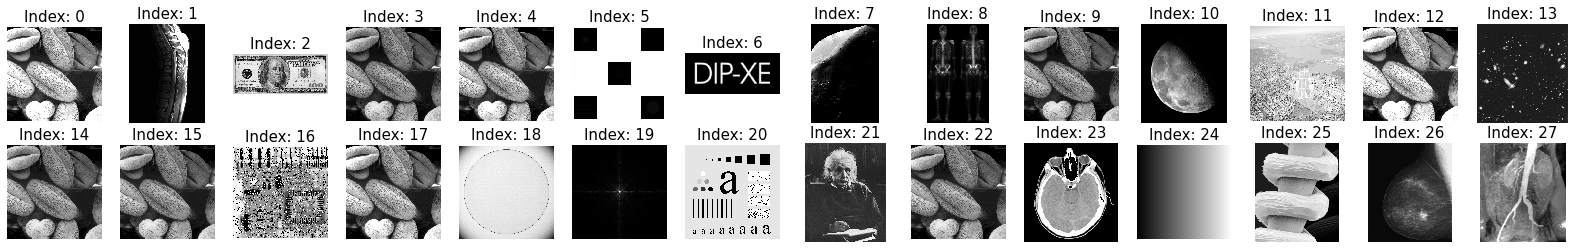

In [ ]:
fig = plt.figure(figsize = (28,4))
idx = 1
for img in gray_scale_img:
  fig.add_subplot(2,14,idx)
  plt.imshow(img, cmap ='gray', origin='upper')
  plt.axis('off')
  plt.title('Index: '+str(idx-1))
  idx+=1

The image of Albert Einstein (Index: 21) and the image of Black to White shade (Index: 24) seem to be good test case images to work with.

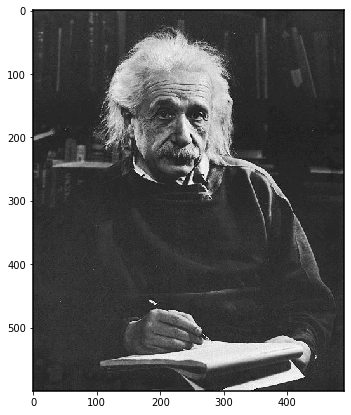

In [ ]:
img = Image.open(img_path[21]).convert('L')
fig = plt.figure(figsize=(10, 7))
plt.imshow(img, cmap ='gray', origin='upper')

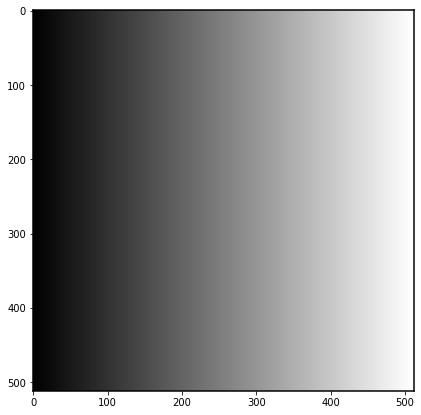

In [ ]:
img1 = Image.open(img_path[24]).convert('L')
fig = plt.figure(figsize=(10, 7))
plt.imshow(img1, cmap ='gray', origin='upper')

# **Task 1:**
(a) Write a function that takes a grayscale image as argument and generates the histogram of that grayscale image.

For this task, we need to define a function that can construct a frequency map of the grayscale levels of all the pixels of the image beforehand.

This function takes an image as argument and returns a frequency map of grayscale levels of all the pixels of the image. The indices of the returned array can be thought of as intensity values and the values are the frequencies of the corresponding intensity values. The time complexity is $O(mn)$, for an $m \times n$ image, which means it calculates the frequencies in one complete scan of the image.

In [ ]:
def get_frequency_map(image):
    img_array = np.array(image)
    freq = np.zeros(256, dtype='int32')
    for row in img_array:
        for pixel in row:
            freq[pixel] += 1;
    return freq

This function plots the histogram using Plotly.

In [ ]:
def invokePlotly(image, levels):
    # fig = px.imshow(image)
    # fig = make_subplots(1, 2)
    # fig.add_trace(go.Image(z=image), 1, 1)
    fig = go.Figure()
    fig.update_layout(height = 600, width = 800)
    for level, frequencies, color in levels:
        fig.add_trace(go.Bar(x=level, y=frequencies, name='', marker=dict(color=color)))
        fig.add_trace(go.Scatter(x=level, y=frequencies,name='Pixel Count', mode='lines+markers', marker=dict(size=2), marker_color=color, fill='tozeroy'))

    fig.update_layout(title = f'Intensity Distribution Histogram',title_x=0.5, xaxis_title= "Intesity Level", yaxis_title="Frequency",font=dict(
            family="TeX Gyre Pagella",
            size=14,
            color="RebeccaPurple"
        ))
    fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
    fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
    fig.show()

This function takes an RGB or Grayscale image as a parameter and plots the histogram of grayscale levels in the case of grayscale images and the histograms of all the color channels in the case of RGB images.

In [ ]:
def generate_histogram(image):
    grayscale_levels = [i for i in range(0,256)]
    if len(np.array(image).shape) > 2:
        red_channel, green_channel, blue_channel, alpha_channel = Image.Image.split(image)
        frequency_map1 = get_frequency_map(red_channel)
        # invokePlotly(grayscale_levels, frequency_map, 'Red')
        frequency_map2 = get_frequency_map(green_channel)
        # invokePlotly(grayscale_levels, frequency_map, 'Green')
        frequency_map3 = get_frequency_map(blue_channel)
        # invokePlotly(grayscale_levels, frequency_map, 'Blue')
        levels = [(grayscale_levels, frequency_map1, 'Red'), (grayscale_levels, frequency_map2, 'Green'), (grayscale_levels, frequency_map3, 'Blue')]
        invokePlotly(image, levels)
    else:
        frequency_map = get_frequency_map(image)
        levels = [(grayscale_levels, frequency_map, 'Gray')]
        invokePlotly(image, levels)
        # invokePlotly(grayscale_levels, frequency_map, color='Gray')

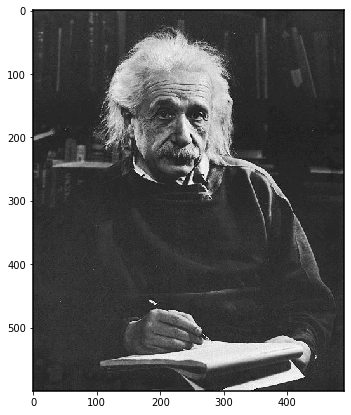

In [ ]:
fig = plt.figure(figsize=(10, 7))
plt.imshow(img, cmap ='gray', origin='upper')
generate_histogram(img)

We can see a uniform distribution of intensity values for the Black to White shade image. This makes sense, because the image covers the whole spectrum and there are an equal number ($1024$) of pixels for all intensity values from $0$ to $255$.

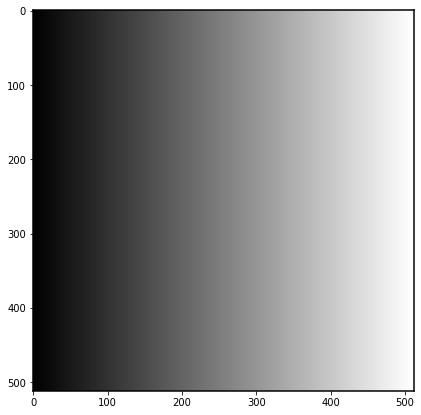

In [ ]:
fig = plt.figure(figsize=(10, 7))
plt.imshow(img1, cmap ='gray', origin='upper')
generate_histogram(img1)

(b) Take any suitable color image and divide it into 3 separate channels. Display the individual channels in their own color. For example, the red channel should generate a red image, where the intensity of red in each pixel will depend on how much red is present in that pixel in the original color image.

This picture of Dr. Jordan B. Peterson with a purplish Channel 4 studio backdrop seems to be a good color photo to analyze.

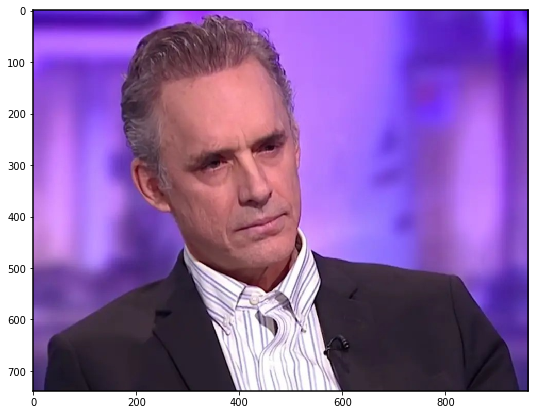

In [ ]:
rgb_img = Image.open('/content/drive/MyDrive/Jordan_Peterson_cropped.jpg')
fig = plt.figure(figsize=(10, 7))
plt.imshow(rgb_img, origin='upper')
# plt.axis('off')

In [ ]:
rgb_image_array = np.array(rgb_img)
rgb_image_array

array([[[ 96,  40, 225, 255],
        [ 97,  41, 225, 255],
        [ 97,  41, 225, 255],
        ...,
        [ 76,   4, 223, 255],
        [ 74,   4, 216, 255],
        [ 72,   4, 211, 255]],

       [[ 90,  36, 212, 255],
        [ 90,  36, 213, 255],
        [ 90,  36, 212, 255],
        ...,
        [ 74,   4, 218, 255],
        [ 72,   4, 212, 255],
        [ 71,   4, 207, 255]],

       [[ 87,  33, 205, 255],
        [ 87,  33, 205, 255],
        [ 87,  33, 205, 255],
        ...,
        [ 75,   4, 218, 255],
        [ 73,   5, 212, 255],
        [ 73,   5, 208, 255]],

       ...,

       [[ 59,  39,  98, 255],
        [ 60,  40,  99, 255],
        [ 61,  41, 100, 255],
        ...,
        [ 60,  46, 120, 255],
        [ 58,  46, 118, 255],
        [ 57,  45, 117, 255]],

       [[ 58,  38,  97, 255],
        [ 59,  39,  98, 255],
        [ 60,  40,  99, 255],
        ...,
        [ 60,  46, 120, 255],
        [ 58,  46, 118, 255],
        [ 57,  45, 117, 255]],

       [[ 57

The resolution of this image is 739×962 and it has 4 channels (R, G, B, A).

In [ ]:
rgb_image_array.shape

(739, 962, 4)

Let's separate the channels and inspect them individually.\
The color palette combinations for RGB is,\
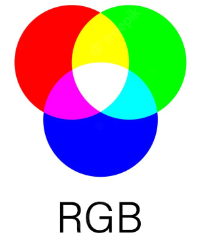\
The colors in this image seem to be consistent with the palette above. A good concentration of Red, Green and Blue together form the white shirt, whereas, we can see only slight presence of these 3 colors in the black suit. The purplish background mostly contains Red and Blue with a slight presence of Green.

Essentially, for an $m \times n \times 3$ image, what's being done is something like,
	\begin{equation}
    	\begin{bmatrix}
        \begin{bmatrix}
           r_{0,0} \\
           g_{0,0} \\
           b_{0,0}
         \end{bmatrix} & \dots &  \begin{bmatrix}
           r_{0,n-1} \\
           g_{0,n-1} \\
           b_{0,n-1}
         \end{bmatrix}\\
        \vdots & \ddots & \vdots \\
        \begin{bmatrix}
           r_{m-1,0} \\
           g_{m-1,0} \\
           b_{m-1,0}
         \end{bmatrix} & \dots & \begin{bmatrix}
           r_{m-1,n-1} \\
           g_{m-1,n-1} \\
           b_{m-1,n-1}
         \end{bmatrix}
        \end{bmatrix}
        \longrightarrow
        \left[\begin{smallmatrix}
        r_{0,0} & \dots & r_{0,n-1}\\
        \vdots & \ddots & \vdots\\
        r_{m-1,0} & \dots & r_{m-1,n-1}
        \end{smallmatrix}\right],
        \left[\begin{smallmatrix}
        g_{0,0} & \dots & g_{0,n-1}\\
        \vdots & \ddots & \vdots\\
        g_{m-1,0} & \dots & g_{m-1,n-1}
        \end{smallmatrix}\right],
        \left[\begin{smallmatrix}
        b_{0,0} & \dots & b_{0,n-1}\\
        \vdots & \ddots & \vdots\\
        b_{m-1,0} & \dots & b_{m-1,n-1}
        \end{smallmatrix}\right]
	\end{equation}

Text(0.5, 1.0, 'Blue Channel')

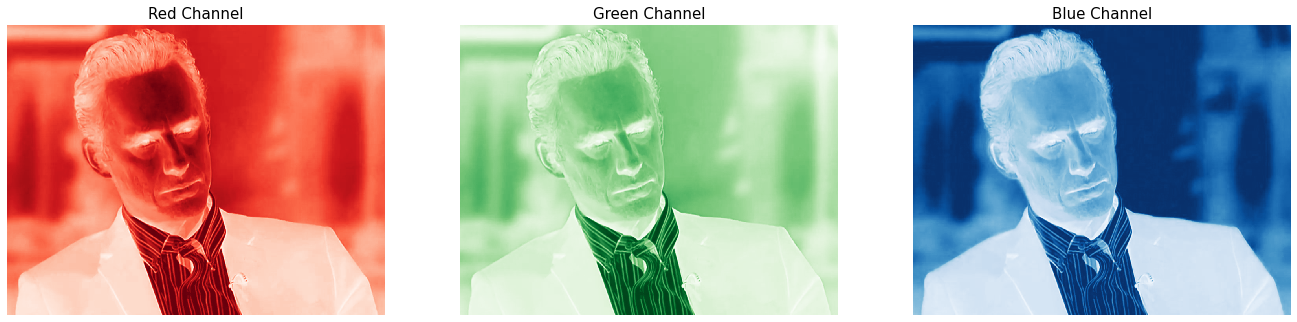

In [ ]:
red_channel, green_channel, blue_channel, alpha_channel = Image.Image.split(rgb_img)
fig = plt.figure(figsize=(23, 30))
fig.add_subplot(1, 3, 1)
plt.imshow(red_channel, cmap='Reds', origin='upper')
plt.axis('off')
plt.title("Red Channel")
fig.add_subplot(1, 3, 2)
plt.imshow(green_channel, cmap='Greens', origin='upper')
plt.axis('off')
plt.title("Green Channel")
fig.add_subplot(1, 3, 3)
plt.imshow(blue_channel, cmap='Blues', origin='upper')
plt.axis('off')
plt.title("Blue Channel")

(c) Use your previously written histogram function from Task 1(a) to generate the histogram of color image. Since color images have 3 channels, so you will have 3 histograms. Analyze the histograms to determine which color is more dominant in the image.

The histogram portrays an overwhelming variety of Blue shades compared to Red and Green shades. The Green shades are comparatively lighter and the Red shades are darker than the Green shades but lighter than the Blue shades. The peaks of the distributions somewhat represent this. Around 17,000 pixels are of Green intensity level 32, around 14,000 pixels are of Red intensity level 40 and a whopping 44,000 pixels are of Blue intensity level 255.

In [ ]:
generate_histogram(rgb_img)

# **Task 2:**
(a) Write a function that takes a grayscale image as argument and returns the negative of that image.

This function takes an image as argument and returns the negative of that image.
$g(x,y) = L_{max} - f(x,y)$ ; where $L_{max}=255$ for an 8-bit image.
In the case of RGB images, the channels have been separated, then negated, then stacked on top of one another again.

In [ ]:
def to_negative(image):
    if len(np.array(image).shape) > 2:
        red_channel, green_channel, blue_channel, alpha_channel = Image.Image.split(image)
        r = np.array(red_channel)
        g = np.array(green_channel)
        b = np.array(blue_channel)
        a = np.array(alpha_channel)
        r = 255 - r
        g = 255 - g
        b = 255 - b
        # a = 255 - a
        neg_img = np.dstack((r,g,b,a))
        # print(neg_img)
        neg_img = Image.fromarray(np.uint8(neg_img))
    else:
        img_array = np.array(image)
        neg_img = 255 - img_array
        neg_img = Image.fromarray(np.uint8(neg_img), 'L')
    return neg_img

As we can observe from the figure below, the darker regions in the original image have become bright, whereas, the brighter pixels have turned dark.

Text(0.5, 1.0, 'Negative')

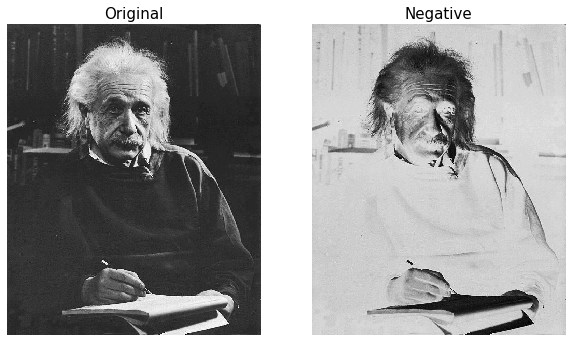

In [ ]:
img3 = to_negative(img)
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(1, 2, 1)
plt.imshow(img, cmap='gray', origin='upper')
plt.axis('off')
plt.title("Original")
fig.add_subplot(1, 2, 2)
plt.imshow(img3, cmap='gray', origin='upper')
plt.axis('off')
plt.title("Negative")

(b) Extend your function so that it works for color images too. 

We can observe, from the figure below, the purplish backdrop, which initially had a good mixture of Red and Blue, has converted to a Greenish hue after negating. This means the presence of Red and Blue have decreased and contrarily, the presence of Green has increased. We can see a similar phenomenon in the case of the white shirt and the black suit.

Text(0.5, 1.0, 'Negative')

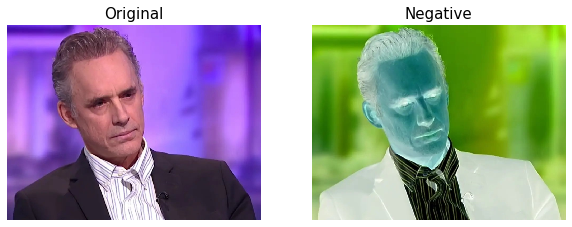

In [ ]:
img4 = to_negative(rgb_img)
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(1, 2, 1)
plt.imshow(rgb_img, origin='upper')
plt.axis('off')
plt.title("Original")
fig.add_subplot(1, 2, 2)
plt.imshow(img4, origin='upper')
plt.axis('off')
plt.title("Negative")

The intensity distributions of the negated images seem like mirror-images to the distribution of the original images.

In [ ]:
generate_histogram(img3)

In [ ]:
generate_histogram(img4)